# Using Tesseract OCR 

In [1]:
%cd tesseract-python

/content/tesseract-python


### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import argparse
import cv2
import os

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
args = {
	"image": "images/example_02.png",
	"preprocess": "blur",
}

In [5]:
# load the example image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# check to see if we should apply thresholding to preprocess the
# image
if args["preprocess"] == "thresh":
	gray = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# make a check to see if median blurring should be done to remove
# noise
elif args["preprocess"] == "blur":
	gray = cv2.medianBlur(gray, 3)
 
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

True

Tesseract Will
Fail With Noisy
Backgrounds



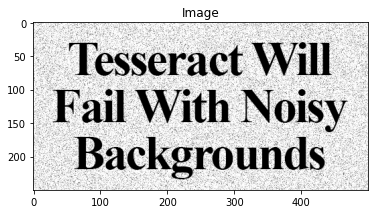

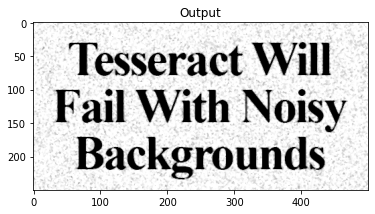

In [6]:
# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)

# show the output images
plt_imshow("Image", image)
plt_imshow("Output", gray)